Título: Voronoi Binning

Data: 23/03/2020
    
Obj: Aplicar o algoritmo de Voronoi para aumentar a razão sinal/ruído em spaxes que possam ser aglotinados. Baseado no código de Michele Cappellari: The Voronoi binning method (VorBin) disponível em: https://www-astro.physics.ox.ac.uk/~mxc/software/#binning e descrito em https://ui.adsabs.harvard.edu/abs/2003MNRAS.342..345C

Autor: Carlos Roberto

In [1]:
from os import path
import numpy as np
import matplotlib.pyplot as plt

import vorbin
from vorbin.voronoi_2d_binning import voronoi_2d_binning

Bin-accretion...
1  /  50
2  /  50
3  /  50
4  /  50
5  /  50
6  /  50
7  /  50
8  /  50
9  /  50
10  /  50
11  /  50
12  /  50
13  /  50
14  /  50
15  /  50
16  /  50
17  /  50
18  /  50
19  /  50
20  /  50
21  /  50
22  /  50
23  /  50
24  /  50
25  /  50
26  /  50
27  /  50
28  /  50
29  /  50
30  /  50
31  /  50
32  /  50
33  /  50
34  /  50
35  /  50
36  /  50
37  /  50
38  /  50
39  /  50
40  /  50
41  /  50
42  /  50
43  /  50
44  /  50
45  /  50
46  /  50
47  /  50
48  /  50
49  /  50
50  /  50
51  /  50
52  /  50
49  initial bins.
Reassign bad bins...
48  good bins.
Unbinned pixels:  17  /  233
Fractional S/N scatter (%): 13.120547525854183
Elapsed time accretion: 0.20 seconds
Elapsed time optimization: 0.00 seconds


/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


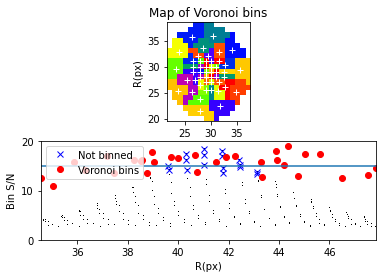

In [2]:
#y: é a posição y de onde foi extraído o sinal e o ruído
#x: é a posição x de onde foi extraído o sinal e o ruído
#signal: é o sinal do spaxel (y,x)
#noise: é o ruído do spaxel (y,x)

y, x, signal, noise = np.loadtxt("GoodPixels.txt").T #Lê a saída do código SNR
targetSN = 15 #Threshold pretendido

    # Perform the actual computation. The vectors
    # (binNum, xNode, yNode, xBar, yBar, sn, nPixels, scale)
    # are all generated in *output*
    #
binNum, xNode, yNode, xBar, yBar, sn, nPixels, scale = voronoi_2d_binning(x, y, signal, 
                                                                          noise, targetSN, plot=1, quiet=0, wvt=False, cvt=False)

    # Save to a text file the initial coordinates of each pixel together
    # with the corresponding bin number computed by this procedure.
    # binNum uniquely specifies the bins and for this reason it is the only
    # number required for any subsequent calculation on the bins.
    #
np.savetxt('Voronoi_OutPut.txt', np.column_stack([y, x, binNum]),header="y_px \t x_px \t Vorbin_Id", fmt=b'%10.6f %10.6f %8i')
plt.subplot(211)
plt.xlabel('R(px)')
plt.ylabel('R(px)')
plt.subplot(212)
plt.xlabel('R(px)')
plt.savefig('/home/carlos/Desktop/SDP/Dynamics/pPXF/Figs/Vorbin.png', format='png')

#Essas são as novas posições dos spaxels binnados

#print(xBar)
#print(yBar)